In [2]:
import csv
import numpy as np
import scipy
from scipy import signal
import sounddevice as sd
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [3]:
vibtac_dict = {'data_1':[], 'data_2':[],
               'data_3':[], 'data_4':[],
               'data_5':[], 'data_6':[],
               'data_7':[], 'data_8':[],
               'data_9':[], 'data_10':[],
               'data_11':[], 'data_12':[]}

with open('S.csv', 'r') as f:
    reader = csv.reader(f)
    sr = 8000
    i = 1
    for row in reader:
        data = np.array(row, dtype=np.float32)
        b, a = signal.butter(3, [20 / sr, 1000 / sr], 'bandpass')
        data = signal.filtfilt(b, a, data)
        vibtac_dict['data_' + str(i)] = data
        i += 1

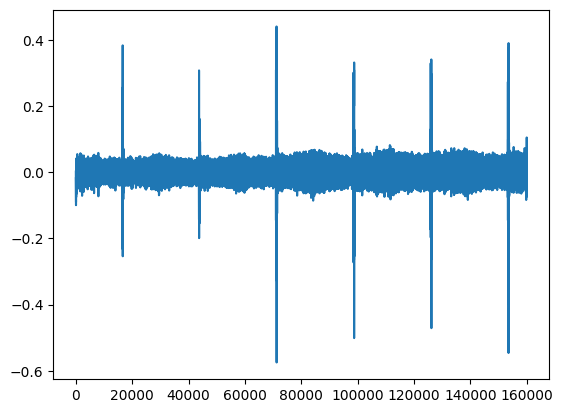

In [17]:
data = vibtac_dict['data_12']
plt.plot(data)
sd.play(data, sr)

-2.6759553e-05


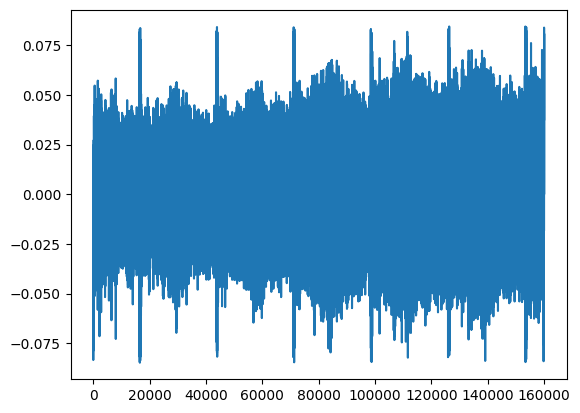

In [18]:
data_array = np.asarray(data, dtype=np.float32)	# 注意：这里要指定 dtype 的类型，否则下面替换时可能会因数据类型不同而导致替换的均值的精度不同

mean = np.mean(data_array, axis=0)
std = np.std(data_array, axis=0)
print(mean)

floor = mean - 3*std
upper = mean + 3*std

for i, val in enumerate(data_array):
    data_array[i] = float(np.where(((val<floor)|(val>upper)), mean, val))


plt.plot(data_array)
sd.play(data_array, sr)

In [19]:
scipy.io.wavfile.write("Texture12.wav", sr, data_array)

In [9]:
data, fs = librosa.load('Texture3.wav', sr=sr)
sd.play(data, sr)

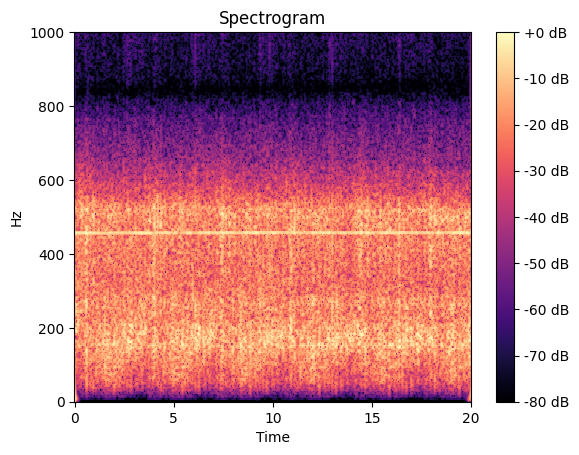

In [72]:
DMatrix = librosa.stft(data, n_fft=2048, hop_length=int(2048 * 0.1), window='hann')
dbMatrix = librosa.amplitude_to_db(np.abs(DMatrix), ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(dbMatrix, sr=sr, n_fft=2048, hop_length=int(2048 * 0.1), y_axis='linear', x_axis='time', ax=ax)
ax.set_title('Spectrogram')
plt.ylim(0, 1000)
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [ ]:
3,4,8,10,12